In [12]:
import altair as alt 
alt.renderers.enable("notebook")

RendererRegistry.enable('notebook')

In [13]:
import pandas as pd

In [14]:
# https://www.madrid.es/portales/munimadrid/es/Inicio/El-Ayuntamiento/Estadistica/Censo-de-locales/Censo-de-Locales/?vgnextfmt=default&vgnextoid=4ba708e2a77bd210VgnVCM2000000c205a0aRCRD&vgnextchannel=2bd6eea8e3e5d210VgnVCM1000000b205a0aRCRD
locales = pd.read_csv("data/locales_madrid.csv")

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (31,32,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
locales.head()

,id_local,id_distrito_local,desc_distrito_local,id_barrio_local,desc_barrio_local,cod_barrio_local,id_seccion_censal_local,desc_seccion_censal_local,coordenada_x_local,coordenada_y_local,...,coordenada_y_agrup,id_agrupacion,nombre_agrupacion,id_tipo_agrup,desc_tipo_agrup,id_planta_agrupado,id_local_agrupado,rotulo,lat,lon
0,10000093,1,CENTRO,104,JUSTICIA,NaN,NaN,74,"441063,55","4474864,39",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LA REVOLTOSA,40.422323,-3.694744
1,10000097,1,CENTRO,104,JUSTICIA,NaN,NaN,77,"440961,09","4475065,95",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BARRIGA LLENA,40.424132,-3.695971
2,10000150,1,CENTRO,106,SOL,NaN,NaN,121,"440154,52","4474271,6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAFE LOS ARCOS BAR,40.416918,-3.705404
3,10000258,1,CENTRO,106,SOL,NaN,NaN,123,"440237,07","4474485,41",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FERPAL,40.418850,-3.704451
4,10000308,1,CENTRO,102,EMBAJADORES,NaN,NaN,37,"440244,62","4473350,64",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CEIP EMILIA PARDO BAZAN,40.408628,-3.704255


In [16]:
len(locales[locales["rotulo"].str.contains("KARAOKE")])

11

In [17]:
counties = alt.Data(url="https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/madrid-districts.geojson",
                    format={"property":"features"})

madrid = alt.Chart(counties).mark_geoshape(
fill="lightgrey").encode().properties(
    width=500,
    height=300
)

In [18]:
karaoke_df = locales[locales["rotulo"].str.contains("FARMACIA")]

points = alt.Chart(karaoke_df).mark_point().encode(
    latitude="lat",
    longitude="lon",
    tooltip="rotulo"
)

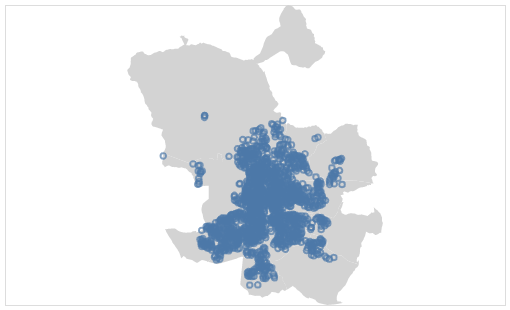

In [19]:
madrid+points